# **`Credit Card Fraud Detection EDA`**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Indentifying the categorical columns

In [13]:
categories = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in categories:
    print({i:df[i].unique()})
    df[i] = pd.Categorical(df[i])

{'SEX': array([1, 2], dtype=int64)}
{'EDUCATION': array([2, 1, 3, 5, 4, 6], dtype=int64)}
{'MARRIAGE': array([1, 2, 3, 0], dtype=int64)}
{'PAY_0': array([-1,  0, -2,  1,  2,  3,  4,  8], dtype=int64)}
{'PAY_2': array([ 0, -1, -2,  2,  3,  5,  7,  4,  1], dtype=int64)}
{'PAY_3': array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5], dtype=int64)}
{'PAY_4': array([ 0, -2, -1,  2,  3,  4,  5,  7], dtype=int64)}
{'PAY_5': array([ 0, -1,  2, -2,  3,  5,  4,  7], dtype=int64)}
{'PAY_6': array([ 0, -1,  2, -2,  3,  6,  4,  7], dtype=int64)}


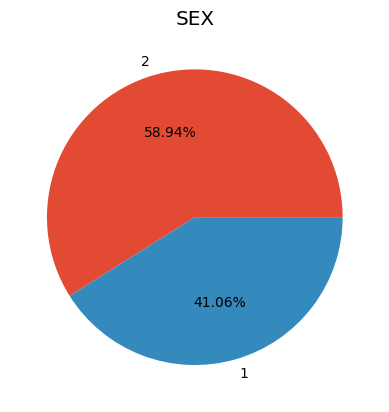

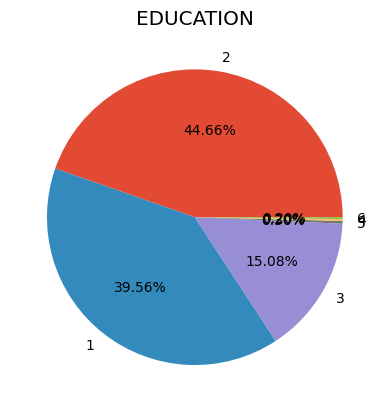

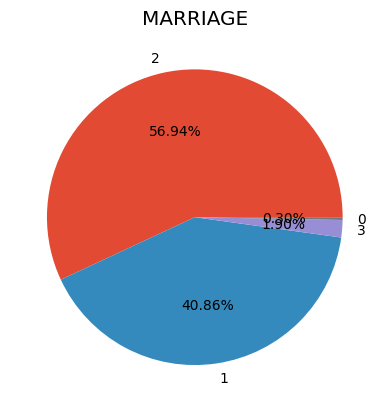

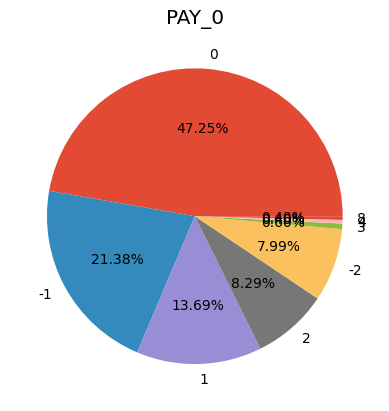

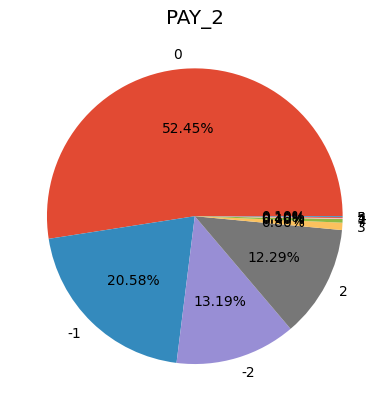

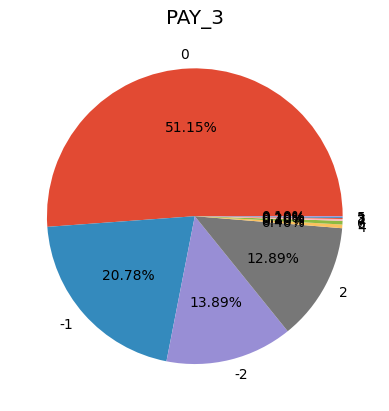

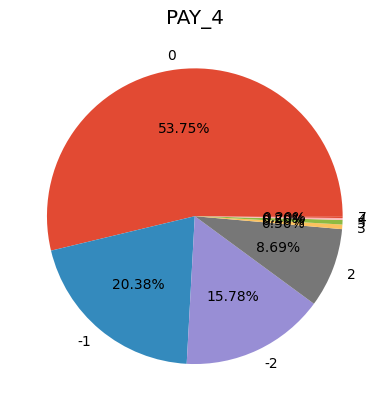

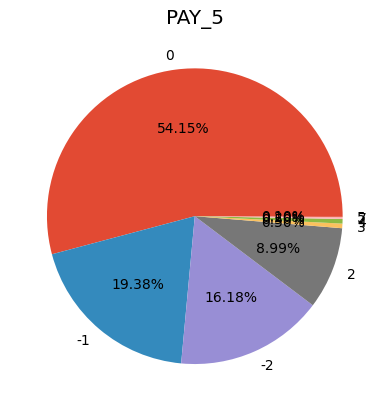

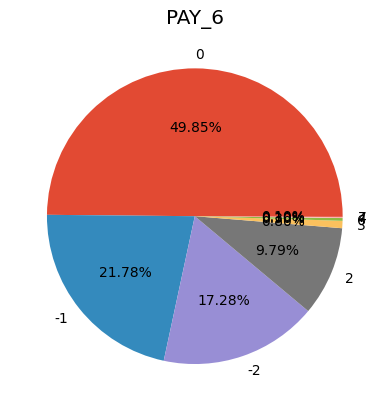

In [ ]:
for i in categories:    
    plt.pie(x=df[i].value_counts(),labels=df[i].value_counts().index, autopct='%0.2f%%')
    plt.title(i.upper())
    plt.show()

# Numerical Columns

In [33]:
from scipy.stats import shapiro

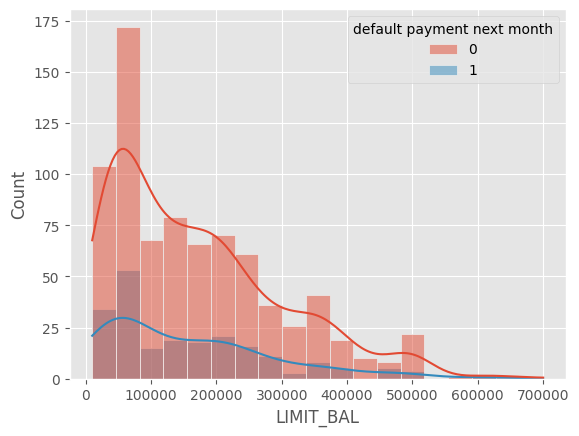

{'LIMIT_BAL': 1.1028537751240731e-24}


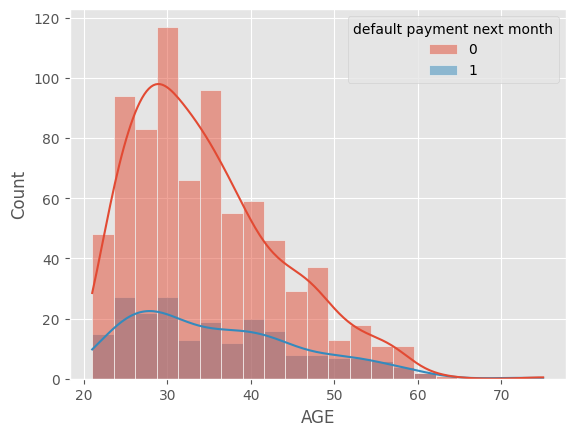

{'AGE': 1.1980364419395793e-19}


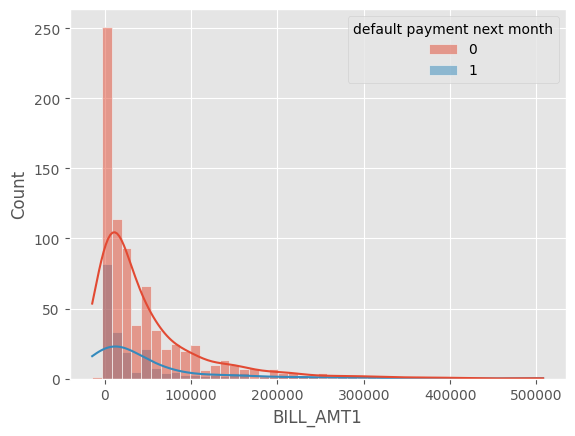

{'BILL_AMT1': 1.4659683884534074e-39}


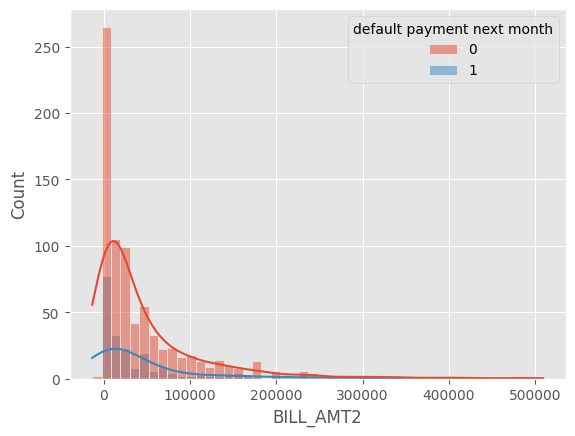

{'BILL_AMT2': 3.974068431840538e-40}


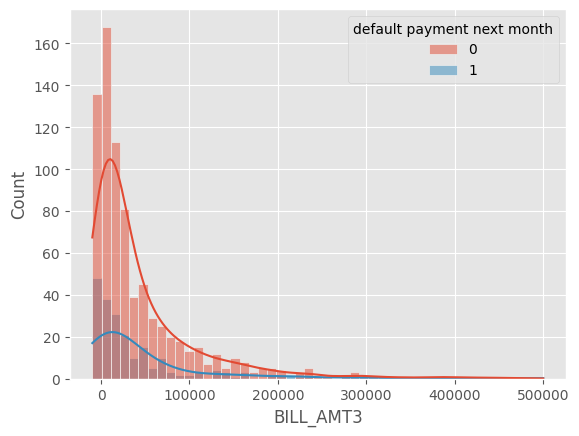

{'BILL_AMT3': 9.476701254535873e-41}


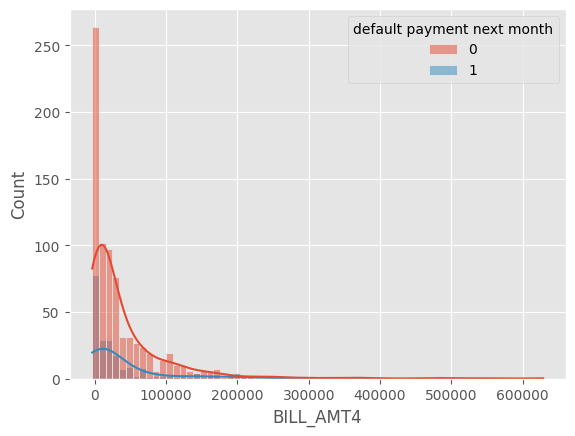

{'BILL_AMT4': 1.0832037129230836e-42}


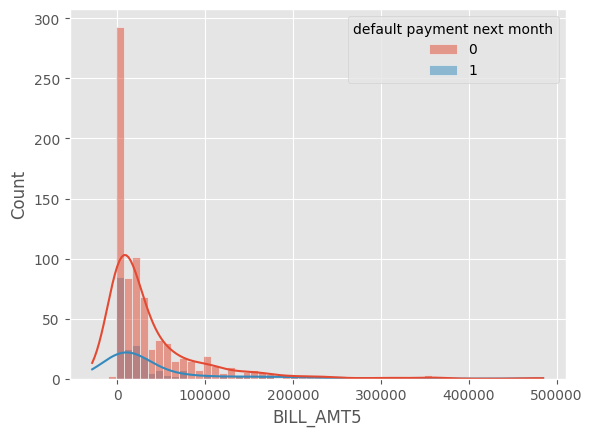

{'BILL_AMT5': 1.72275633204093e-41}


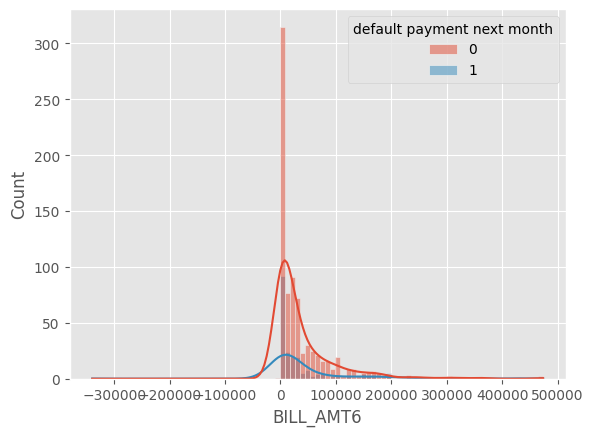

{'BILL_AMT6': 5.179058994298091e-41}


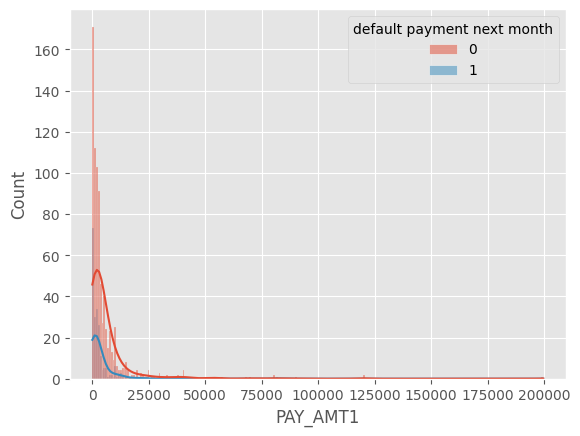

{'PAY_AMT1': 0.0}


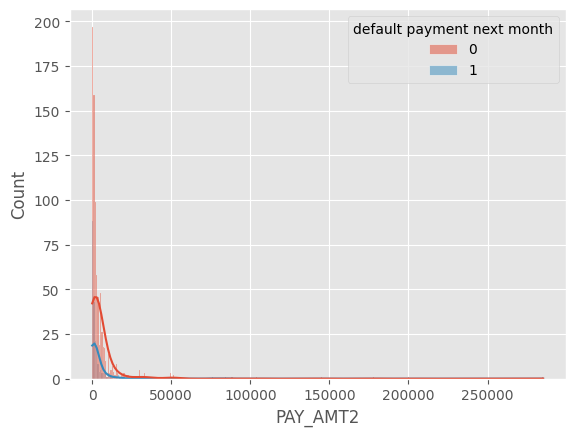

{'PAY_AMT2': 0.0}


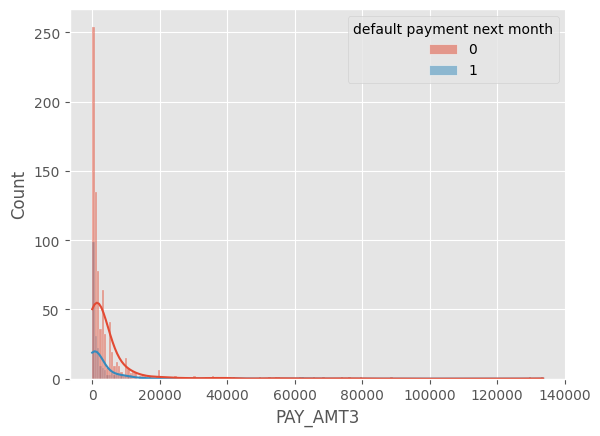

{'PAY_AMT3': 0.0}


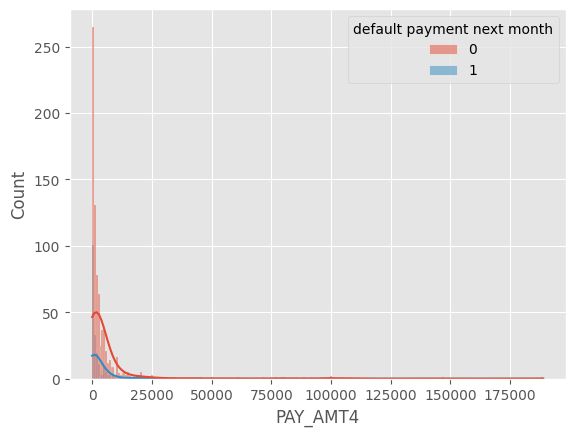

{'PAY_AMT4': 0.0}


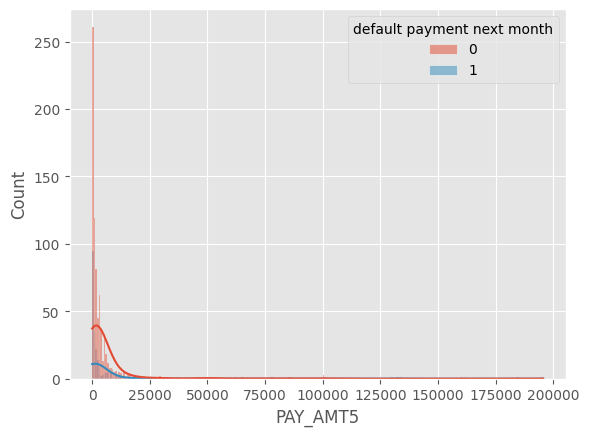

{'PAY_AMT5': 0.0}


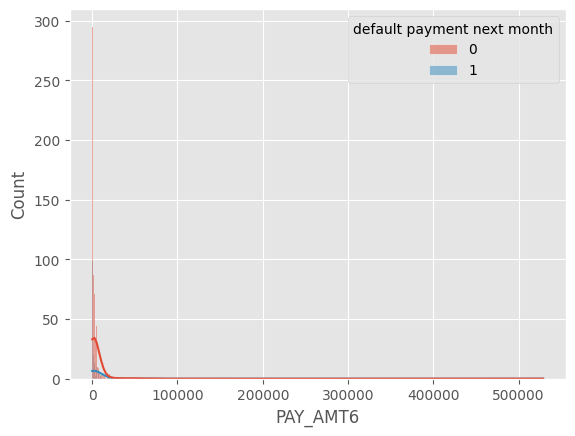

{'PAY_AMT6': 0.0}


In [44]:
for i in df.columns:
    if i not in categories and i != "default payment next month" :
        sns.histplot(data=df , x = i , hue= "default payment next month",kde=True )
        plt.show()
        _ , p = shapiro(df[i])
        print({i:p})

## Log - transform numerical columns to convert them into normal data

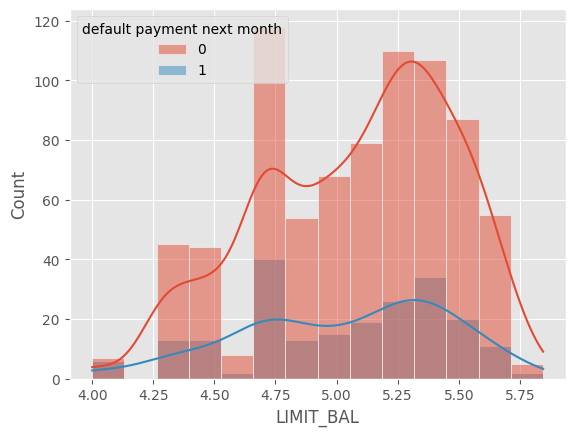

{'LIMIT_BAL': 1.079666946327668e-15}


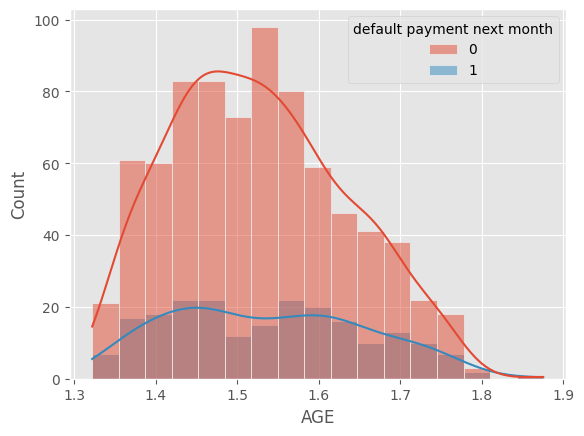

{'AGE': 6.941253995196295e-12}


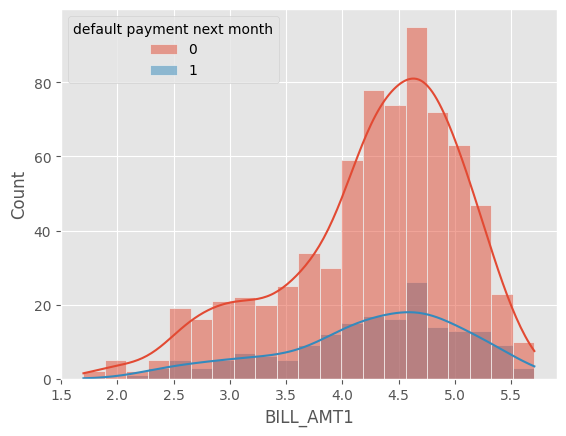

{'BILL_AMT1': 1.0}


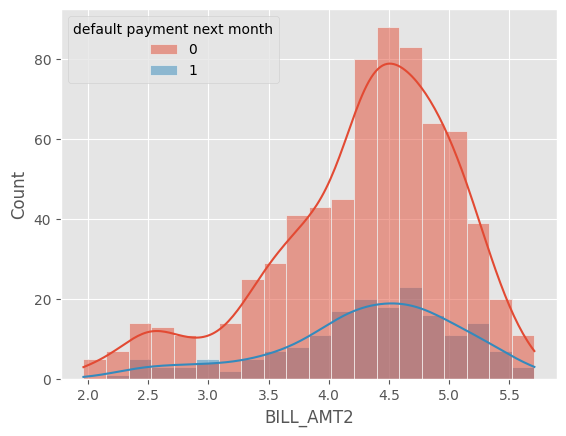

{'BILL_AMT2': 1.0}


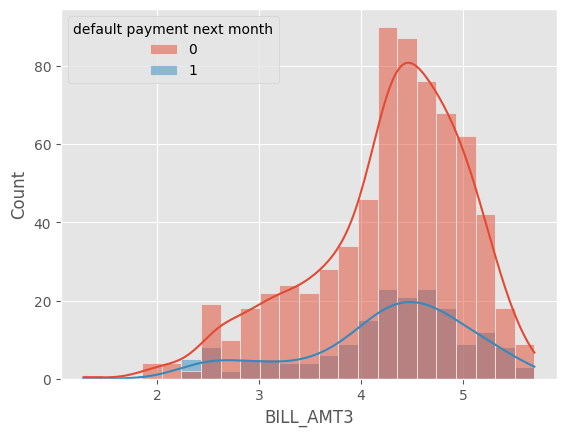

{'BILL_AMT3': 1.0}


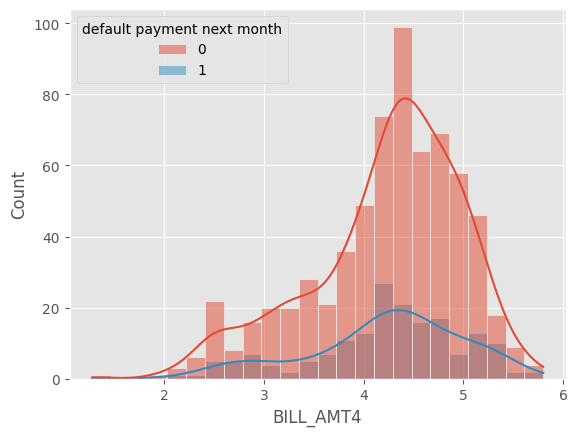

{'BILL_AMT4': 1.0}


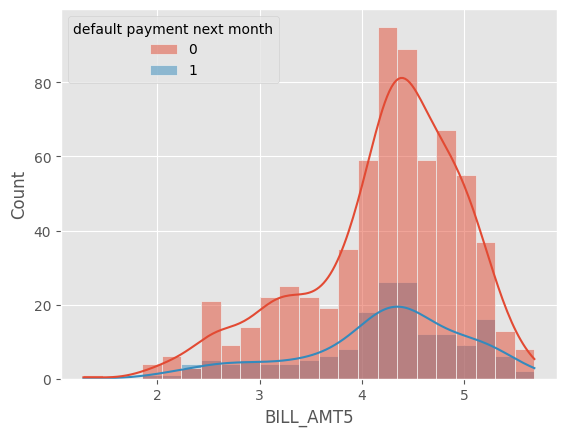

{'BILL_AMT5': 1.0}


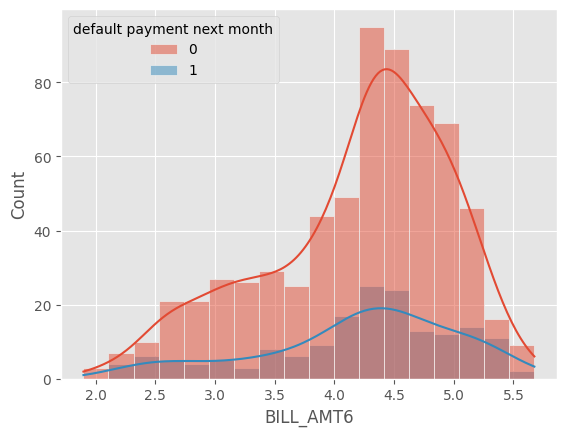

{'BILL_AMT6': 1.0}


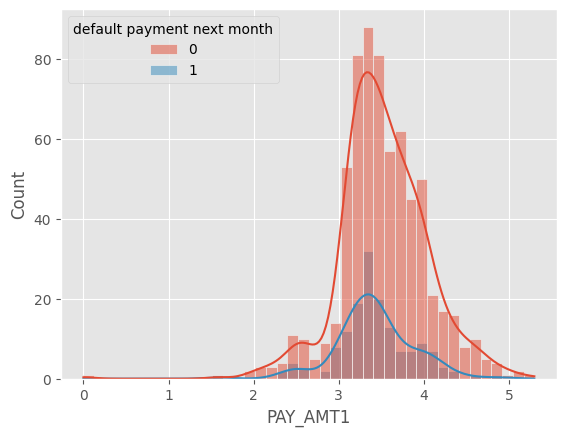

{'PAY_AMT1': 1.0}


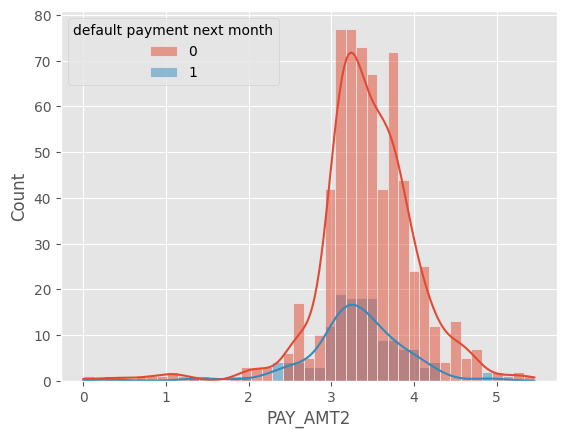

{'PAY_AMT2': 1.0}


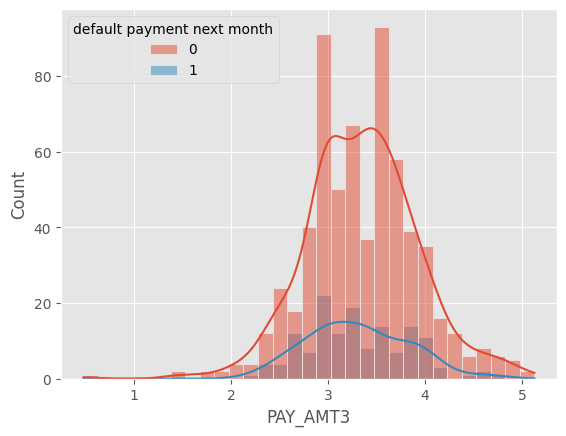

{'PAY_AMT3': 1.0}


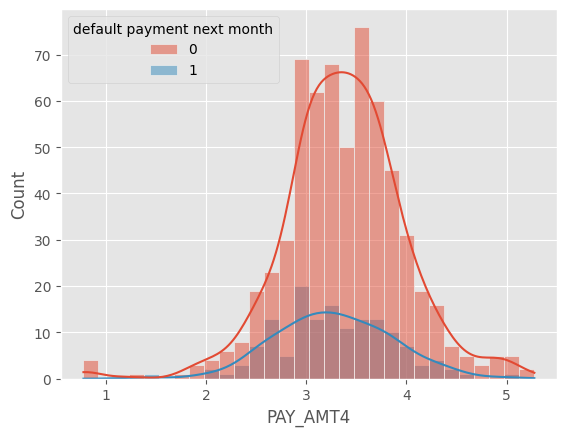

{'PAY_AMT4': 1.0}


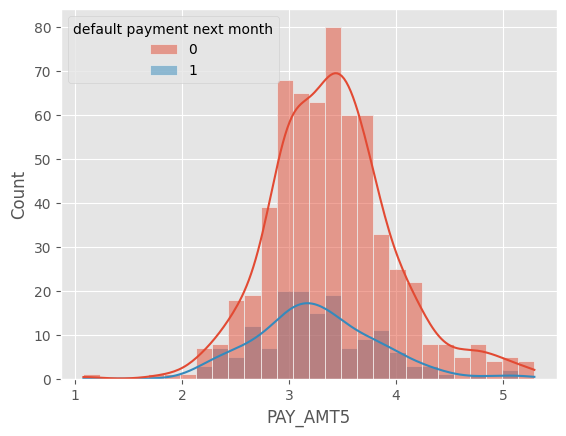

{'PAY_AMT5': 1.0}


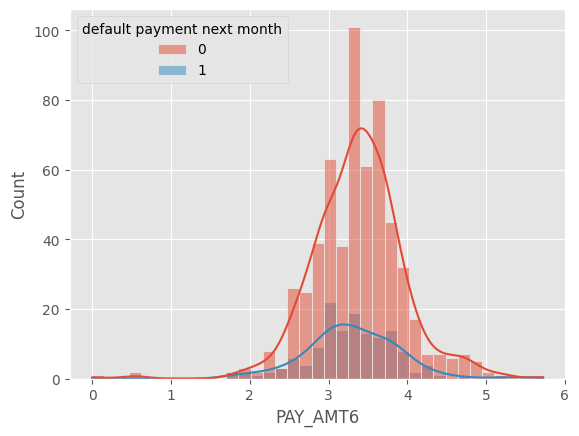

{'PAY_AMT6': 1.0}


In [45]:
# Data after log transformation
for i in df.columns:
    if i not in categories and i != "default payment next month" :
        x = np.log10(df[i])
        sns.histplot(data=df , x = x , hue= "default payment next month",kde=True )
        plt.show()
        _ , p = shapiro(x)
        print({i:p})

# Target analysis

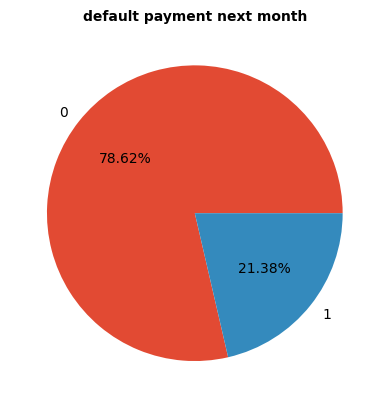

In [53]:
target =   df["default payment next month"].value_counts()
plt.pie(x= target.values, labels= target.index , autopct="%.2f%%")
plt.title("default payment next month",size=10,weight="bold")
plt.show()

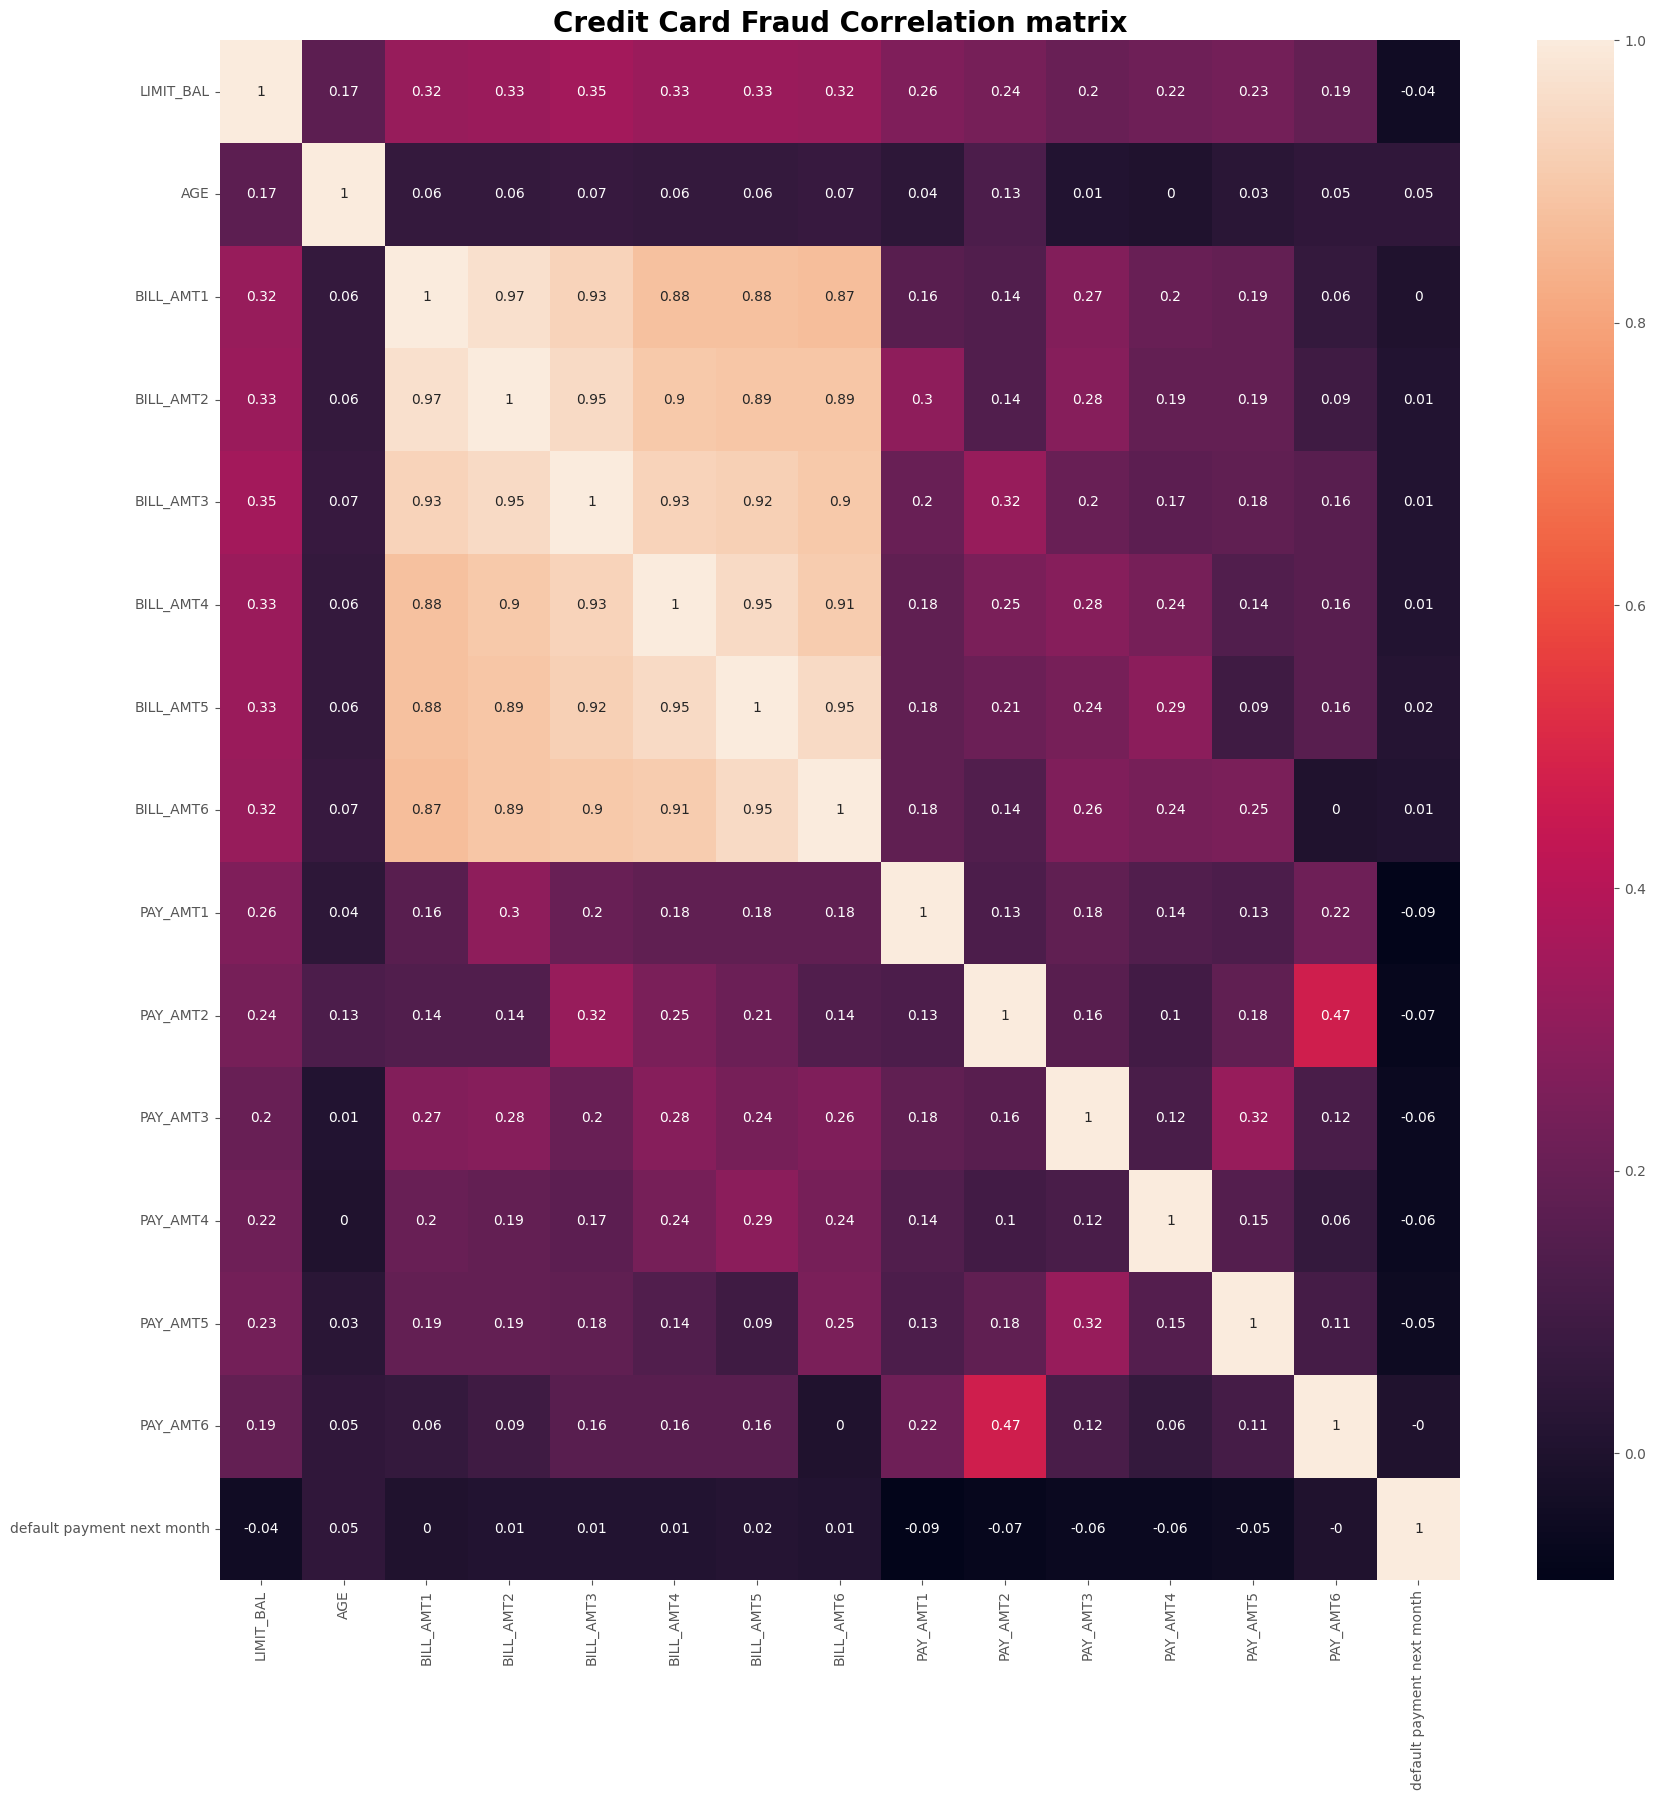

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(df[[x for x in df.columns if x not in categories ]].corr().round(2),annot=True)
plt.title('Credit Card Fraud Correlation matrix' , fontsize = 20 , weight='bold')
plt.show()

## Bill amounts have high correlation with each other